In [7]:
import matplotlib.pyplot as plt
import numpy as np

Mola nova

In [14]:
RPM_Motora3 = [1640,
               1638,
               1590,
               2840,
               3106,
               2737,
               3683,
               3700,
               3696]

RPM_Movida3 = [416,
               373,
               338,
               3310,
               3714,
               3272,
               4285,
               4483,
               4476]

print('Caso 3 - Mola velha com carga')
relacao3 = [RPM_Motora3[i]/RPM_Movida3[i] for i in range(len(RPM_Motora3))]
Rmax3 = (relacao3[0] + relacao3[1] + relacao3[2])/3
RPM_Rmax3 = (RPM_Motora3[0] + RPM_Motora3[1] + RPM_Motora3[2])/3
print(f'Redução máxima: {Rmax3:.2f} a {RPM_Rmax3:.0f} RPM')

Rmin3 = (relacao3[3] + relacao3[4] + relacao3[5])/3
RPM_Rmin3 = (RPM_Motora3[3] + RPM_Motora3[4] + RPM_Motora3[5])/3
print(f'Redução mínima: {Rmin3:.2f} a {RPM_Rmin3:.0f} RPM')

print(f'Faixa de trabalho CVT: {RPM_Rmax3:.0f} a {RPM_Rmin3:.0f} RPM ({RPM_Rmin3 - RPM_Rmax3:.0f})')

RPM_F3 = (RPM_Motora3[-1]+RPM_Motora3[-2]+RPM_Motora3[-3])/3
print(f'RPM final: {RPM_F3:.0f}')

R_F3 = (relacao3[-1] + relacao3[-2] + relacao3[-3])/3
print(f'Relação à {RPM_F3:.0f} RPM: {R_F3:.2f}')

velocidade3 = [((0.377*0.25*RPM_Motora3[i])/(7.2*relacao3[i]))
               for i in range(len(RPM_Motora3))]
Vmax3 = (velocidade3[-1]+velocidade3[-2]+velocidade3[-3])/3

print(f'Velocidade máxima: {Vmax3:.2f} Km/h')

torque_Motor = [
    24.9,  # 2k
    26.5,  # 2,5k
    26,  # 3k
    22.5  # 3,6
]

f2k3 = ((3.3 * 7.2)*torque_Motor[0])/0.25
f25k3 = ((Rmin3 * 7.2)*torque_Motor[1])/0.25
f3k3 = ((Rmin3 * 7.2)*torque_Motor[2])/0.25
f36k3 = ((Rmin3 * 7.2)*torque_Motor[3])/0.25

print(f'Força na roda em 2000 RPM: {f2k3:.0f} N')
print(f'Força na roda em 2500 RPM: {f25k3:.0f} N')
print(f'Força na roda em 3000 RPM: {f3k3:.0f} N')
print(f'Força na roda em 3600 RPM: {f36k3:.0f} N')

print('Temperatura da correia no fim do teste: 56 ºC')

Caso 3 - Mola velha com carga
Redução máxima: 4.35 a 1623 RPM
Redução mínima: 0.84 a 2894 RPM
Faixa de trabalho CVT: 1623 a 2894 RPM (1272)
RPM final: 3693
Relação à 3693 RPM: 0.84
Velocidade máxima: 57.79 Km/h
Força na roda em 2000 RPM: 2366 N
Força na roda em 2500 RPM: 644 N
Força na roda em 3000 RPM: 632 N
Força na roda em 3600 RPM: 547 N
Temperatura da correia no fim do teste: 56 ºC


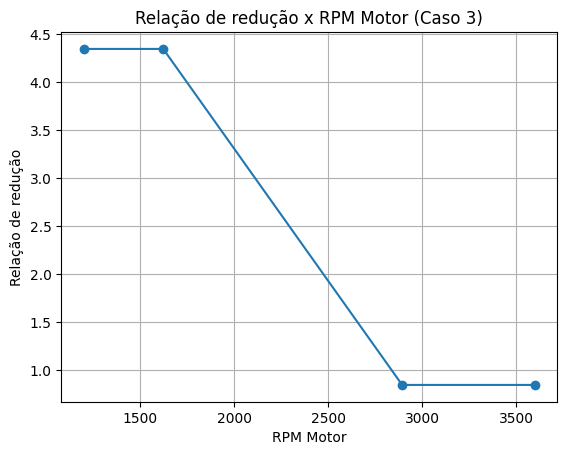

In [9]:
RPM_Motora_F3 = [1200, RPM_Rmax3, RPM_Rmin3, 3600]
Relacao_F3 = [Rmax3, Rmax3, Rmin3, Rmin3]

plt.plot(RPM_Motora_F3, Relacao_F3, 'o-', label='Caso 3')
plt.grid()
plt.xlabel('RPM Motor')
plt.ylabel('Relação de redução')
plt.title('Relação de redução x RPM Motor (Caso 3)')
plt.show()

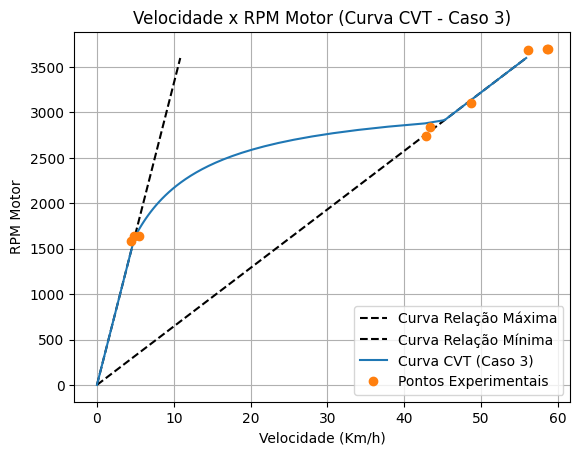

In [15]:
RPM = np.linspace(0, 3600, 101)


def rela3(RPM):
    if RPM <= RPM_Rmax3:
        return Rmax3
    else:
        if RPM <= RPM_Rmin3:
            a = (Rmax3-Rmin3)/(RPM_Rmax3-RPM_Rmin3)
            b = Rmax3-(RPM_Rmax3*a)
            return (a*RPM)+b
        else:
            return Rmin3


V_F3 = [((0.377*0.25*RPM_Motora_F3[i])/(7.2*Relacao_F3[i]))
        for i in range(len(RPM_Motora_F3))]

V3 = [((0.377*0.25*RPM[i])/(7.2*rela3(RPM[i])))
      for i in range(len(RPM))]

V_Rel_Max3 = [((0.377*0.25*RPM[i])/(7.2*Rmax3))
              for i in range(len(RPM))]

V_Rel_Min3 = [((0.377*0.25*RPM[i])/(7.2*Rmin3))
              for i in range(len(RPM))]

plt.plot(V_Rel_Max3, RPM, 'k--', label='Curva Relação Máxima')
plt.plot(V_Rel_Min3, RPM, 'k--', label='Curva Relação Mínima')
plt.plot(V3, RPM, '-', label='Curva CVT (Caso 3)')
plt.plot(velocidade3, RPM_Motora3, 'o', label='Pontos Experimentais')
plt.legend()
plt.grid()
plt.xlabel('Velocidade (Km/h)')
plt.ylabel('RPM Motor')
plt.title('Velocidade x RPM Motor (Curva CVT - Caso 3)')
plt.show()